In [ ]:
%load_ext autoreload 
%autoreload 2

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Data classes

In [ ]:
from cbviz.cbviz.utils import DataNum

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

dn = DataNum(df, ncols=2)

In [ ]:
expected = np.repeat('floating', 1)
observed = df.apply(infer_dtype).values
type(expected)

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

df2 = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})
df2['s1'] = df2['s1'].astype('category')

In [ ]:
from cbviz.cbviz.utils import DataMix

In [ ]:
DataMix(df2, ncat=2)

# KDE related 

## Split violin 

In [ ]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [ ]:
from cbviz.cbviz.kdetools import SplitViolin

In [ ]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

leg = ax.legend(handles=sp.get_s2_legend(colors=('cornflowerblue', 'salmon')), 
                loc='upper left', handlelength=0.4,
                bbox_to_anchor=(0, 1.0, 0, 0.15), ncol=2, fontsize='x-small')
leg.get_frame().set_linewidth(0.2)

[ax.axhline(i, lw=0.5, ls=":", c='0.5') for i in (sp.get_s1_ticks()[0])]
ax.set_xlabel(sp.ylabel)
# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.cbviz.kdetools import Ridge

In [ ]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=1.2)

In [ ]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

# Scatterplots

## XYview

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYview
from adjustText import adjust_text

In [ ]:
cond = df.index.isin(metabolites)
xv = XYview(df, highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '.5'), alpha=1)

In [ ]:
!pip install adjustText

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
xv.add_correlation(fontsize='small')
xv.add_reg_line(color='cornflowerblue', lw=1)
xv.label_dots(adjust=True, fontsize='small')
xv.label_xy()
fig.savefig('./test/Test-XYview.pdf')

## XYpairs

In [ ]:
from cbviz.cbviz.xytools import XYpairs

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [ ]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)

In [ ]:
np.ptp(all.values.ravel()) * 0.02

In [ ]:
all = all.iloc[:, [1,0,3,2]]

In [ ]:
cond = all.index.isin(metabolites)
xp = XYpairs(all, lower_tri=False)

In [ ]:
plt.style.use('cviz')

fig = plt.figure(figsize=(5, 5))

gs = xp.add_gridspec(hspace=0.3, wspace=0.4)

pairs = xp.get_pairs(highlight=metabolites, s=np.where(cond, 40, 10), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1, 0.5))
for pair in pairs:
    ax = fig.add_subplot(gs[pair.position])
    ax.tick_params(labelsize='xx-small', pad=0)
    xv = pair.XYview
    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    xv.add_reg_line()
    xv.label_dots(adjust=True, fontsize='x-small')
    if pair.combo == ['FG_effect_sgNT', 'sgARNTL2_effect_FG']:
        xv.add_correlation(loc=1)
    else:
        xv.add_correlation(loc=4)
    xv.label_xy(fontsize='x-small', outer=True)

## XYzoom

In [ ]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()

In [ ]:
from cbviz.cbviz.xytools import XYzoom

In [ ]:
xz = XYzoom(df, ('min', 0), ('min', 0))

In [ ]:
top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

In [ ]:
top5

In [ ]:
plt.style.use('cviz')

xz = XYzoom(df, ('min', 0), ('min', 0))

top5 = xz.zoom_data.mean(1).nsmallest(5).index.to_list()
cond = xz.data.df.index.isin(top5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))

ax2.scatter(xz.x, xz.y, **xz.scatter_kw)
xz.add_xy_line(ax2)
xz.add_rect(ax=ax2)
ax1.scatter(xz.x, xz.y, s=np.where(cond, 20, 5), c=np.where(cond, 'r', '.5'), alpha=0.5, linewidths=0)
xz.connect(ax2, ax1, 'left', lw=0.5, ls=':')
xz.label_xy(ax=ax1, outer=False, fontsize='x-small')
xz.label_dots(top5, ax=ax1, adjust=True, adjust_kwargs={'arrowprops':{'arrowstyle':'-', 'lw':0.2}}, fontsize=4)

# Boxplots

## Box plus strip plot

In [ ]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

In [ ]:
from cbviz.cbviz.bptools import StripBox

In [ ]:
sb = StripBox(data, p_method_global='Anova', s1_order=['WT', 'Balanced', 'Minor', 'Major'])

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(2.5,2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_global_p(fontsize='xx-small')

In [ ]:
sb.calc_pairwise_p(adj_method='fdr_bh')

In [ ]:
plt.style.use('cviz')

fig, ax = plt.subplots(figsize=(3, 2.5))

sb.boxplt()
sb.add_strips(s=20, alpha=0.50, linewidths=0)
sb.add_pair_p(groupA='WT', groupB='Minor', yoffset=0.5, cut_p=True)

In [ ]:
from scipy.stats import f_oneway, ttest_ind

In [ ]:
x, y = [np.random.normal(i, size=100) for i in range(2)]

In [ ]:
data['s1'] = data['s1'].astype('category')

In [ ]:
from pandas.api.types import is_categorical_dtype
def cat_cleaner(series):
    if is_categorical_dtype(series):
        return series.cat.remove_unused_categories()
    else:
        return series

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])]['s1']#.apply(cat_cleaner)

In [ ]:
data[data['s1'].isin(['WT', 'Balanced'])].apply(cat_cleaner)['s1']

# Dotplot

In [6]:
df = pd.read_csv('./Dotplot_input.csv')
df.columns

Index(['x', 'y', 'fdr', 'med_tstat'], dtype='object')

In [ ]:
hm = pd.read_table('/home/carlo/Dokumente/Data/HALLMARK_related/Hallmark_Sets_PerCategory.tsv')
hm = hm[hm['Name'].isin(df['y'])]
df['y'] = df['y'].astype('category').cat.reorder_categories(hm['Name'].to_list())

In [7]:
fdr = df.pivot(index='y', columns='x', values='fdr').fillna(1)

In [13]:
fdr

x,G1,G2,G3,G4,G5,G6
y,,,,,,
ADIPOGENESIS,3.767007e-04,1.940215e-02,1.124407e-03,1.000000e+00,1.320872e-04,1.000000
ANDROGEN_RESPONSE,1.000000e+00,1.000000e+00,6.162847e-07,7.194684e-03,3.189602e-07,1.000000
ANGIOGENESIS,1.919173e-02,3.733542e-02,4.377584e-02,1.000000e+00,1.157737e-03,0.013327
APICAL_JUNCTION,1.538726e-04,4.630886e-08,6.965650e-10,2.064868e-06,9.833112e-06,0.006818
APICAL_SURFACE,1.000000e+00,1.000000e+00,3.122347e-05,2.643221e-02,1.920122e-03,1.000000
APOPTOSIS,3.238057e-04,2.585901e-03,6.048752e-06,1.838375e-04,8.583180e-05,1.000000
CHOLESTEROL_HOMEOSTASIS,1.000000e+00,1.000000e+00,8.666621e-04,2.643221e-02,1.527341e-02,0.024813
COAGULATION,1.000000e+00,2.689477e-02,1.751366e-08,3.912711e-02,3.137800e-05,0.013327
COMPLEMENT,1.000000e+00,6.335349e-03,6.371552e-06,1.000000e+00,1.900031e-04,1.000000


In [14]:
fdr.values.ravel()

array([3.76700708e-04, 1.94021482e-02, 1.12440689e-03, 1.00000000e+00,
       1.32087222e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       6.16284680e-07, 7.19468414e-03, 3.18960246e-07, 1.00000000e+00,
       1.91917342e-02, 3.73354197e-02, 4.37758391e-02, 1.00000000e+00,
       1.15773665e-03, 1.33269778e-02, 1.53872617e-04, 4.63088563e-08,
       6.96564988e-10, 2.06486772e-06, 9.83311191e-06, 6.81812811e-03,
       1.00000000e+00, 1.00000000e+00, 3.12234729e-05, 2.64322130e-02,
       1.92012245e-03, 1.00000000e+00, 3.23805711e-04, 2.58590073e-03,
       6.04875210e-06, 1.83837500e-04, 8.58318044e-05, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 8.66662085e-04, 2.64322130e-02,
       1.52734100e-02, 2.48134953e-02, 1.00000000e+00, 2.68947693e-02,
       1.75136617e-08, 3.91271132e-02, 3.13780019e-05, 1.33269778e-02,
       1.00000000e+00, 6.33534923e-03, 6.37155207e-06, 1.00000000e+00,
       1.90003092e-04, 1.00000000e+00, 1.46264189e-16, 6.54415858e-05,
      

In [17]:
xx, yy = np.meshgrid(range(6), range(34))

In [8]:
progr = df.pivot(index='y', columns='x', values='med_tstat')
cls = progr.values.ravel()

In [22]:
xx, yy = [arr.ravel() for arr in np.meshgrid(range(6), range(34))]

In [36]:
fdr.min(1).min()

2.523119394074169e-41

In [129]:
sz = pd.cut(-np.log10(fdr.values.ravel()), bins=[-np.log10(i) for i in [1, 0.05, 1e-5, 1e-10, 1e-40, 1e-100]], include_lowest=True, labels=[0, 20, 40, 60, 80])

In [54]:
from matplotlib.lines import Line2D

In [130]:
sz

[20, 20, 20, 0, 20, ..., 20, 20, 0, 20, 20]
Length: 204
Categories (5, int64): [0 < 20 < 40 < 60 < 80]

In [132]:
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=i, label=l) for i, l in zip((4, 8, 10, 12), ('<= 0.05', '<= 1e-5', '<= 1e-10', '<= 1e-40'))]

In [125]:
from matplotlib.colors import CenteredNorm

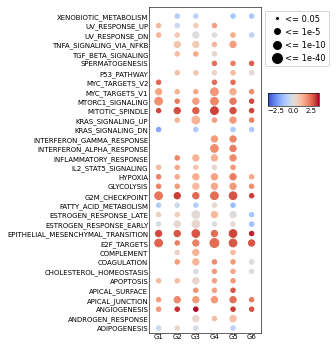

In [135]:
fig, ax = plt.subplots(figsize=(2,6))
# sz = -np.log10(fdr.values.ravel())*10
sp = ax.scatter(xx, yy, s=sz, c=cls, cmap=plt.cm.coolwarm, norm=CenteredNorm(vcenter=0))
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(-0.5, 34)
ax.set_yticks(np.arange(34), fdr.index.to_list());
ax.set_xticks(np.arange(6), fdr.columns.to_list());
ax.legend(handles = handles, bbox_to_anchor=(1, 0.8, 0.1, 0.2), fontsize='small', handletextpad=0)
cax = fig.add_axes([0.95, 0.65, 0.35, 0.03])
fig.colorbar(sp, cax=cax, orientation='horizontal')